<a href="https://colab.research.google.com/github/Cherow/Mercy-_Cherotich-_week9_moringaschool_datasciencecore_ip/blob/main/Mercy_cherotich_week9_moringadatasciencecore_NaivebayesModel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

## Week 9:Naive Bayes

## 1. Defining the Question

### a) Specifying the Data Analytic Question

building a model to predict whether an email is spam or not given the words and character in the email

### b) Defining the Metric for Success

the metrics of success is accuracy and should be between 60 and 95 in order to ensure no overfitting and underfitting

### c) Understanding the context 

Beyond the annoyance and the time wasted sifting through unwanted messages, spam can cause significant harm by infecting users’ computers with malicious software capable of damaging systems and stealing personal information. It also can consume network resources thus need to come up with a model that help identify if a mail is scam or not

### d) Recording the Experimental Design

1.Importing the libraries

2.loading the dataset

3.data cleaning and preparation

4.Building model

5.Follow up questions

6.Conclusion and Recomendation

### e) Data Relevance

The link of the spambase data is ('/content/spambase (1).data)the data had 58 columns and 
out of 58 variables, 48 attributes are continuous, real and determines the frequency of words like “data”, “telnet”, “technology”, “1999” and many more, 6 attributes are continuous and real and characters like “;”, “(”, “[“ and so on, 1 is continuous and real attribute named “capital_run_length_longest” which determines length of longest uninterrupted sequence of capital letters, 1 continuous and integer attribute named capital_run_length_total which determines sum of length of uninterrupted sequences of capital letters and last attribute is Class which determines whether it is spam or not by 0 and 1.

## 2. Reading the Data

In [2]:
#loading libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
# Loading the Data from the source i.e. csv
# ---
names = pd.read_csv('/content/spambase.names',sep = 'delimiter')
names
data = pd.read_csv('/content/spambase (1).data',header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1




## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
data.shape

(4601, 58)

In [5]:
# Previewing the top of our dataset
#
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
# Previewing the bottom of our dataset
# 
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [7]:
# Checking whether each column has an appropriate datatype
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

## 4. Tidying the Dataset

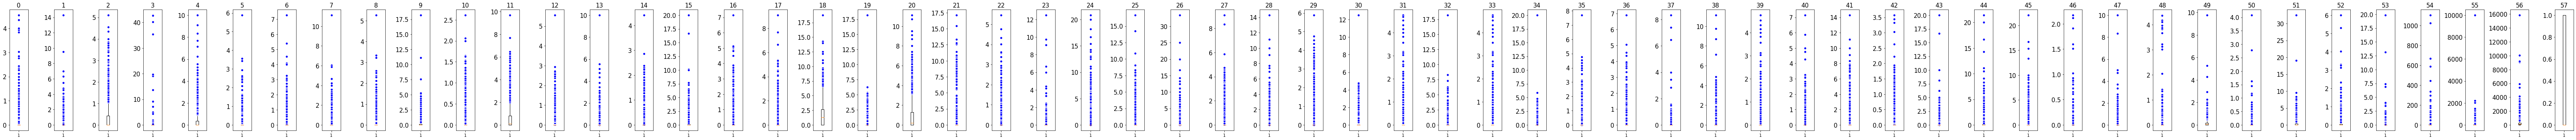

In [8]:
# Checking for Outliers
#
blue_circle = dict(markerfacecolor = 'blue', marker='o',markeredgecolor = 'white')
fig,axs = plt.subplots(1, len(data.columns),figsize = (90,5))
for i , ax in enumerate (axs.flat):
  ax.boxplot(data.iloc[:,i],flierprops=blue_circle)
  ax.set_title(data.columns[i],fontsize= 15)
  ax.tick_params(axis = 'y',labelsize = 15)
plt.tight_layout()

the data had outliers but we will retain them since some emails may contain more words in email than others

In [9]:
# Identifying the Missing Data
#
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64

our data has no missing values

In [10]:
# checking columns that has zeros
(data ==0).sum(axis =0)


0     3548
1     3703
2     2713
3     4554
4     2853
5     3602
6     3794
7     3777
8     3828
9     3299
10    3892
11    2276
12    3749
13    4244
14    4265
15    3360
16    3638
17    3563
18    1374
19    4177
20    2178
21    4484
22    3922
23    3866
24    3511
25    3790
26    3821
27    4138
28    4229
29    4132
30    4308
31    4396
32    4196
33    4386
34    4116
35    4002
36    3772
37    4518
38    4217
39    4148
40    4453
41    4260
42    4226
43    4274
44    3290
45    4084
46    4538
47    4398
48    3811
49    1886
50    4072
51    2343
52    3201
53    3851
54       0
55       0
56       0
57    2788
dtype: int64

many columns had zeros which means the absence of that word of character in the email

## 5. Exploratory Analysis

In [11]:
# Ploting the bivariate summaries and recording our observations
#
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

this is to find the various mean and count of words and characters in the email

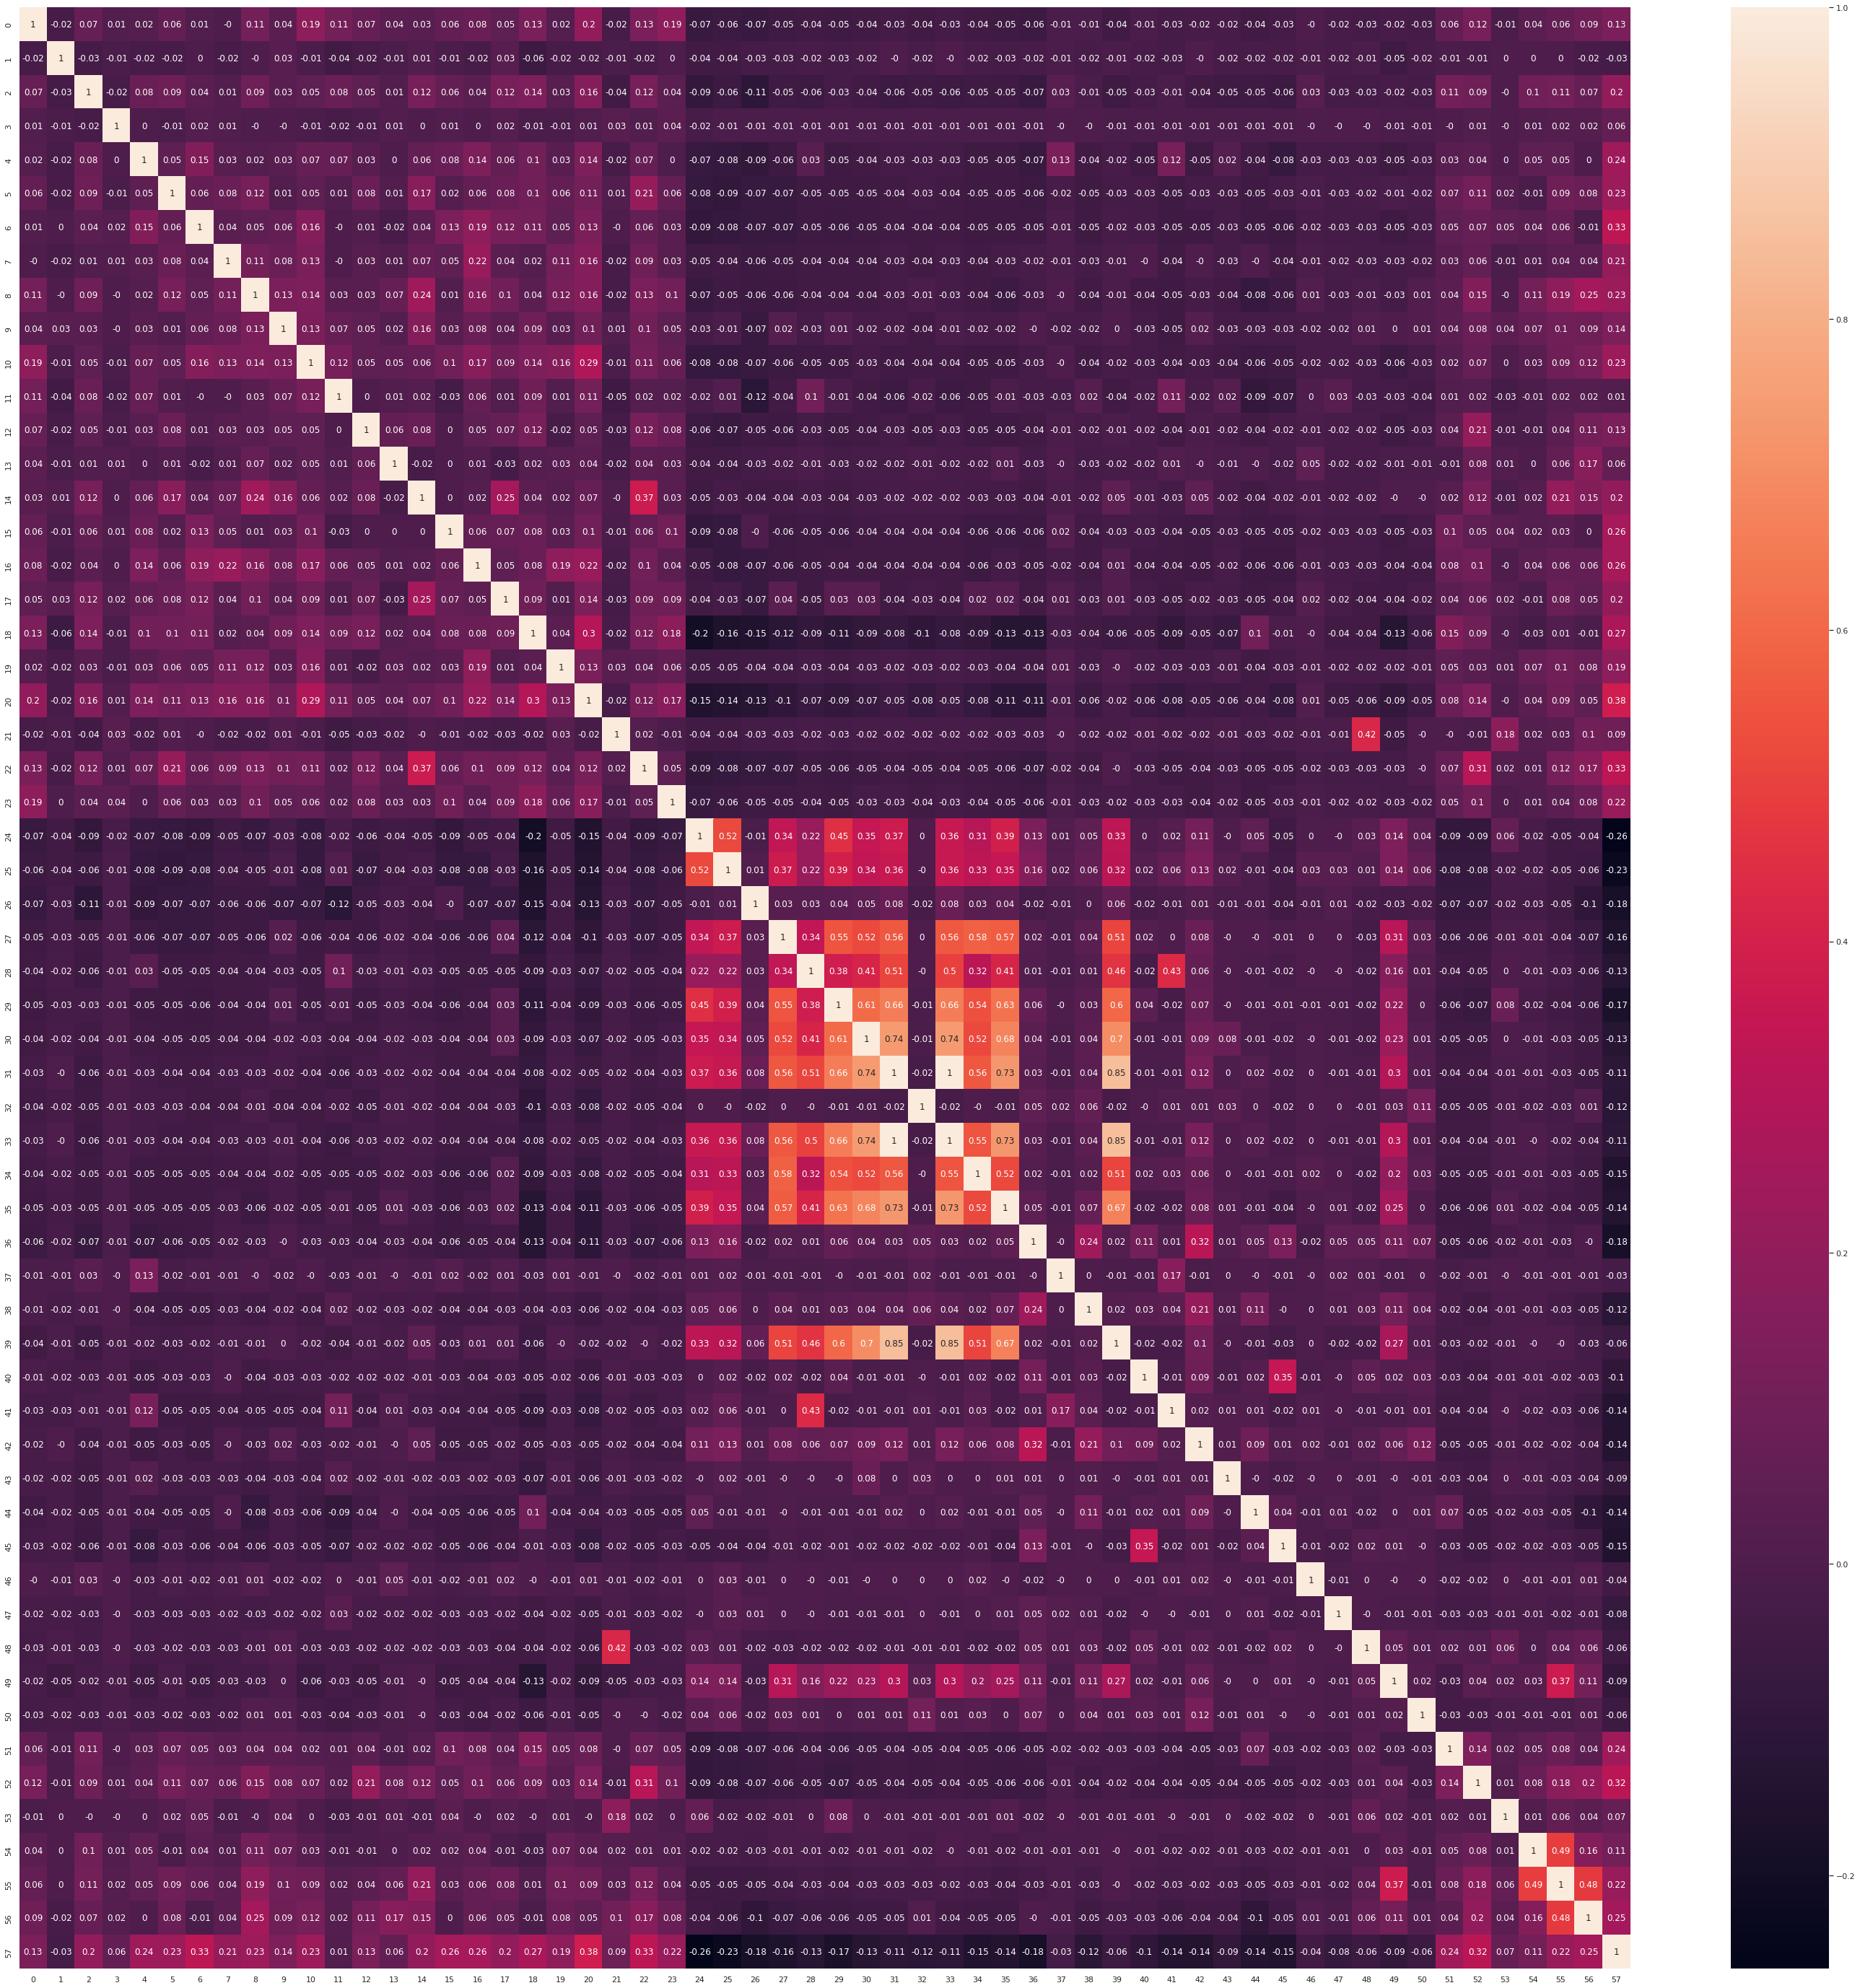

In [12]:
#finding the correlation
corr =round(data.corr(),2)
corr
#visualising using a heatmap
sns.set(rc= {'figure.figsize':(50,50)})
sns.heatmap(corr,annot=True)

## 6. Implementing the Solution

a.spiliting data into 80-20

In [13]:
# spliting data into label and features
# 
X = data.drop([57],axis=1)
y = data[57]
#spiliting our data into train and test.test=20%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#fitting the model we will use bernouli naive bayes
model = BernoulliNB()
model.fit(X_train,y_train)
#making prediction
y_pred = model.predict(X_test)

In [15]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.8773072747014115
confusion_matrix of model: [[495  43]
 [ 70 313]]


the accuracy of our model is 87.7% and 808 out of 921 were correctly classified

b.spiliting data into 70-30

In [16]:
# spliting data into label and features
# 
X = data.drop([57],axis=1)
y = data[57]
#spiliting our data into train and test.test=30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
#fitting the model we will use bernouli naive bayes
model =BernoulliNB()
model.fit(X_train,y_train)
#making prediction
y_pred = model.predict(X_test)

In [18]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.8754525706010138
confusion_matrix of model: [[769  53]
 [119 440]]


our model has accuracy of 87.5 and 1209 out of 1381 were correctly classified

c.splitting 60-40

In [50]:
# spliting data into label and features
# 
X = data.drop([57],axis=1)
y = data[57]
#spiliting our data into train and test.test=40%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [51]:
#fitting the model we will use bernouli naive bayes
model = BernoulliNB()
model.fit(X_train,y_train)
#making prediction
y_pred = model.predict(X_test)

In [52]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.8772406300923411
confusion_matrix of model: [[1025   72]
 [ 154  590]]


our model has accuracy of 87.7% which is same of 80-20 split and 1615 out of 1781 were correctly classified and so we are going to optimize the 60-40 split since it has a high accuracy and highest numner of classificatio in order to improve its performance

optimizing our model

In [53]:
#we scale our data in order to improve it performanca
scaler =Normalizer()
scaler.fit(X_train)
X_test = scaler.transform(X_test)
X_train= scaler.transform(X_train)

In [43]:
#our data has 58 features but we are going to use PCA to reduce the number of our features to 2
pca = PCA(n_components=55)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#using the explained variance to get the features
explained_variance = pca.explained_variance_ratio_
explained_variance 
#features = pd.DataFrame(explained_variance,X.columns,columns=['variance'])
#features.sort_values(by='variance',ascending=False)

array([9.11853327e-01, 8.50110948e-02, 1.08500907e-03, 4.70160603e-04,
       3.26841886e-04, 2.29176023e-04, 2.03773618e-04, 8.29919181e-05,
       7.20954774e-05, 5.79576504e-05, 5.43340349e-05, 4.07475652e-05,
       3.77893990e-05, 3.54804794e-05, 3.33277170e-05, 2.98492187e-05,
       2.83672566e-05, 2.76916266e-05, 2.56052461e-05, 2.39800973e-05,
       2.19772054e-05, 1.98890178e-05, 1.77668949e-05, 1.70394080e-05,
       1.69442073e-05, 1.58163968e-05, 1.44751327e-05, 1.29868982e-05,
       1.14870953e-05, 1.08306334e-05, 9.17098917e-06, 8.21831358e-06,
       7.96952115e-06, 7.70187347e-06, 6.86691736e-06, 6.57326408e-06,
       6.44409180e-06, 5.93197723e-06, 5.67481938e-06, 5.42611692e-06,
       4.73059105e-06, 4.35863418e-06, 3.82496707e-06, 3.56954303e-06,
       3.44613388e-06, 3.30277928e-06, 3.00392178e-06, 2.94277512e-06,
       2.74192692e-06, 2.48894063e-06, 2.22850468e-06, 1.92770474e-06,
       1.75894236e-06, 4.54667775e-07, 4.28069410e-07])

the explained variance for our variables are very small thus the need to used all the features since trying to reduce the number of features reduces the accuracy
with 57 variables the accuracy is 87 and using 55 the accuracy is 80

In [54]:
#fitting the model we will use bernouli naive bayes
model = BernoulliNB()
model.fit(X_train,y_train)
#making prediction
y_pred = model.predict(X_test)

In [55]:
#assessing the performance of our model
print('accuracy of model :',metrics.accuracy_score(y_test,y_pred))
print('confusion_matrix of model:',metrics.confusion_matrix(y_test,y_pred))

accuracy of model : 0.8772406300923411
confusion_matrix of model: [[1025   72]
 [ 154  590]]


after scaling our features the accuracy of our model didnot change it remained 87.7%

## 7. Challenging the solution

>after trying different spilt and found the best split as 80-20 with accuracy of 87.7% we challenged our accuracy by scaling the features but the accuracy did not change it remained 87.7%
and trying to reduce number of features the accuracy reduced





## 8. Follow up questions

### a). Did we have the right data?

yes we had the right data to correctly determine if a mail is spam or not

### b). Do we need other data to answer our question?

yes we needed more data to answer our questions since the data did not give the descriptions of the columns,we used other sources to get the descriptions

### c). Did we have the right question?

yes we had the write questions it is important to be able to detect if a mail is spam or not as this will help eradicate the effects of such malpractises

## 9.Conclusion And Recomendation
Conclusion

we used a Bernouli naive bayes to train our model and we got accuracy of 87.7% and after scaling our model accuracy did not change it remained 87.7% and trying to reduce the number of features the accuracy reduce.

Recomendations

to improve the accuracy of our model i recomend trying another naive bayes model eg categorical bayes as it may perform better